<a href="https://colab.research.google.com/github/poornaditya1/Indian-Currency-Classifier/blob/master/Indian_Currency_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
local_zip = '/content/drive/My Drive/Indian Currency Classifier/436904_829691_bundle_archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/My Drive/Indian Currency Classifier')
zip_ref.close()

In [2]:
base_dir = '/content/drive/My Drive/Indian Currency Classifier/indian_currency_new'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

In [3]:
train_10_dir = os.path.join(train_dir, '10')
train_100_dir = os.path.join(train_dir, '100')
train_20_dir = os.path.join(train_dir, '20')
train_200_dir = os.path.join(train_dir, '200')
train_2000_dir = os.path.join(train_dir, '2000')
train_50_dir = os.path.join(train_dir, '50')
train_500_dir = os.path.join(train_dir, '500')

In [4]:
validation_10_dir = os.path.join(validation_dir, '10')
validation_100_dir = os.path.join(validation_dir, '100')
validation_20_dir = os.path.join(validation_dir, '20')
validation_200_dir = os.path.join(validation_dir, '200')
validation_2000_dir = os.path.join(validation_dir, '2000')
validation_50_dir = os.path.join(validation_dir, '50')
validation_500_dir = os.path.join(validation_dir, '500')

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=1,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 584 images belonging to 7 classes.


In [28]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode='categorical')

Found 167 images belonging to 7 classes.


In [29]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=584,  # images = batch_size * steps
      epochs=8,
      validation_data=validation_generator,
      validation_steps=167,  # images = batch_size * steps
      verbose=1)

Epoch 1/8
584/584 [==============================] - 70s 119ms/step - loss: 1.9942 - accuracy: 0.1301 - val_loss: 1.9400 - val_accuracy: 0.1497
Epoch 2/8
584/584 [==============================] - 69s 118ms/step - loss: 1.9226 - accuracy: 0.1918 - val_loss: 3.3572 - val_accuracy: 0.1437
Epoch 3/8
584/584 [==============================] - 68s 117ms/step - loss: 1.9403 - accuracy: 0.2226 - val_loss: 1.8723 - val_accuracy: 0.2335
Epoch 4/8
584/584 [==============================] - 72s 123ms/step - loss: 1.8804 - accuracy: 0.2551 - val_loss: 1.7306 - val_accuracy: 0.3473
Epoch 5/8
584/584 [==============================] - 70s 120ms/step - loss: 1.6521 - accuracy: 0.3904 - val_loss: 1.6590 - val_accuracy: 0.4192
Epoch 6/8
584/584 [==============================] - 68s 116ms/step - loss: 1.2736 - accuracy: 0.5634 - val_loss: 0.9586 - val_accuracy: 0.7066
Epoch 7/8
584/584 [==============================] - 68s 117ms/step - loss: 0.7631 - accuracy: 0.7397 - val_loss: 0.7719 - val_accuracy:

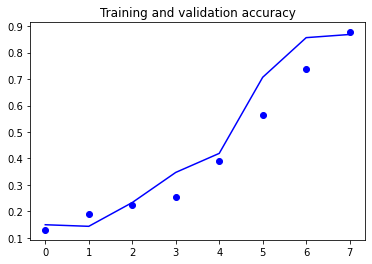

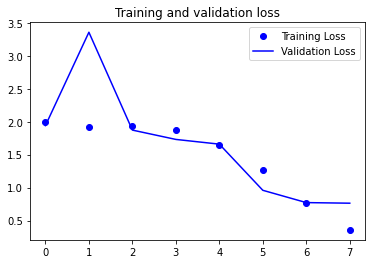

In [30]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [40]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0] == 1:
    print("10")
  if classes[0][1] == 1:
    print("100")
  if classes[0][2] == 1:
    print("20")
  if classes[0][3] == 1:
    print("200")
  if classes[0][4] == 1:
    print("2000")
  if classes[0][5] == 1:
    print("50")
  if classes[0][6] == 1:
    print("500")

Saving 0.jpg to 0 (2).jpg
Saving 2000.jpg to 2000 (2).jpg
0.jpg
2000
2000.jpg
2000


2000
